Code used to generate main text figure 4b

In [200]:
import glob
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import BootstrapFunctions as bsf
import matplotlib.cm
plt.rcParams['hatch.linewidth'] = 7.5

ibm_pal_rb = sns.blend_palette(['#648fff','#785ef0','#dc267f',],as_cmap=True)
ibm_full_list = ['#648fff','#785ef0','#dc267f','#fe6100','#ffb000','#000000','#ffffff']
category_palette = sns.color_palette(['#648fff','#785ef0','#dc267f',],as_cmap=True)

In [ ]:
from matplotlib.font_manager import FontProperties
fontpath = ''
labelfont = FontProperties(fname=fontpath,size=14)

In [202]:
sns.color_palette(ibm_full_list)

[(0.39215686274509803, 0.5607843137254902, 1.0),
 (0.47058823529411764, 0.3686274509803922, 0.9411764705882353),
 (0.8627450980392157, 0.14901960784313725, 0.4980392156862745),
 (0.996078431372549, 0.3803921568627451, 0.0),
 (1.0, 0.6901960784313725, 0.0),
 (0.0, 0.0, 0.0),
 (1.0, 1.0, 1.0)]

In [203]:
#List out the perturbation types: u is up, d is down, n is none. l for lambda, g for gamma.  Add 1,2 to balance the neutral points
pertcases = {"lngn":[0,1,2],"lngu":[3,4,5],"lngd":[6,7,8],
             "lugn":[9,10,11],"lugu":[12,13,14],"lugd":[15,16,17],
             "ldgn":[18,19,20],"ldgu":[21,22,23],"ldgd":[24,25,26]}
oneparamperts = pertcases["lngn"]+pertcases["lugn"]+pertcases["ldgn"]+pertcases["lngu"]+pertcases["lngd"]
no_nonperts = pertcases["lugn"]+pertcases["ldgn"]+pertcases["lngu"]+pertcases["lngd"]
inv_pertcases = {v_int:k for k, v in pertcases.items() for v_int in v}

In [204]:
paramlist = ['lambda','beta_x','gamma','beta_y','alpha','beta_z','nx','Kx','ny','Ky','offset']
byfilelist = ['fileN','fileda','filedb','sysname']

In [205]:
idx = pd.IndexSlice

In [206]:
def rate(x,y,alpha,nx,Kx,ny,Ky,o):
    return alpha*(y**ny)/(Ky**ny+y**ny) + ((x**nx)/(Kx**nx+x**nx)) + o
def rate_deriv_x(x,nx,Kx):
    return nx*(x**(nx-1))*(Kx**nx)/(Kx**nx+x**nx)**2
def rate_deriv_y(y,alpha,ny,Ky):
    return alpha*ny*(y**(ny-1))*(Ky**ny)/(Ky**ny+y**ny)**2
def sensitivty_x(x,y,alpha,nx,Kx,ny,Ky,o):
    return x*rate_deriv_x(x,nx,Kx)/rate(x,y,alpha,nx,Kx,ny,Ky,o)
def sensitivty_y(x,y,alpha,nx,Kx,ny,Ky,o):
    return y*rate_deriv_y(y,alpha,ny,Ky)/rate(x,y,alpha,nx,Kx,ny,Ky,o)

def fx_LNA(x,nxy,nxx,nyy,T):
    return ((1+T)*x*nxy**2 + nyy - nxx*(x*nyy+T*x*nxy))/(x*(nxy**2-nxx*nyy))
def fy_LNA(x,nxy,nxx,nyy,T):
    return (T*x*nxx**2 - nxy*(1+T*x*nxy))/(x*(nxy**2-nxx*nyy))

In [207]:
avg_x = 34.08981427494063
avg_y = 23.863271388392096

In [208]:
l,beta_x,gamma,beta_y,alpha,beta_z,nx,Kx,ny,Ky,offset = 4.5,0.1,0.7,1,1,1,6,40,-5,20,0

In [209]:
sensitivty_x(avg_x,avg_y,alpha,nx,Kx,ny,Ky,offset)

2.109810215322394

In [210]:
#folders = ['Data/IntHill_consistent_violations_test/06-26 1235/system_6','Data/IntHill_consistent_violations_test/06-26 1235/system_0']
folders = glob.glob('Data/singlelineplots/12-10 1256/*')
dat = []
failedsims = []
bootstrapdicts = []

for i,folder in enumerate(folders):
    files = glob.glob(folder+'/*data.csv',recursive=True)
    for j,f in enumerate(files):
        data = pd.read_csv(f)
        data = data.reset_index().rename(columns={'index':'perturbation'})
        numstrings = f.split("_")[-2].split('n')
        data['fileN'] = 0
        data['fileda'] = 0
        data['filedb'] = float(numstrings[3])
        data['sysname'] = "/".join(f.split("/")[:-1])
        data.rename(columns={'F_<x>':'F_<x> (wrong)','F_<y>':'F_<y> (wrong)'},inplace=True)
        if (data[['Cov Bal xx','Cov Bal yy','Cov Bal xy','Cov Bal xz','Cov Bal yz','Cov Bal zz']] > 0.05).any(axis=1).any():
            failedsims.append(f)
            continue
        dat.append(data)
analysed_data = pd.concat(dat)

#analysed_data = analysed_data[(analysed_data["filedb"]>=0.005)&(analysed_data["fileda"]>=0.005)]

analysed_data['perturbation class'] = analysed_data['perturbation'].apply(lambda x: inv_pertcases[x])
pertdata = analysed_data.set_index(["fileN",'fileda','filedb','sysname','perturbation','perturbation class'])

In [211]:
sensitivty_x(data['<x>'],data['<y>'],
                                        data['lambda'],data['nx'].astype(float),data['Kx'].astype(float),
                                        data['ny'].astype(float),data['Ky'].astype(float),data['offset'])

0    0.768116
1    0.768836
2    0.768601
3    0.762223
4    0.762452
5    0.762170
6    0.772994
7    0.773680
8    0.772703
dtype: float64

In [212]:
len(failedsims)

0

[-0.00932014  0.          0.00898891] [ 0.00079607  0.         -0.00088931]
[-0.00182857  0.00429328  0.01041903] [-2.36593499e-05 -6.40194174e-04 -1.13982397e-03]
[-0.00774486 -0.00482617 -0.00167075] [6.69420429e-04 2.26851414e-04 5.01021527e-05]


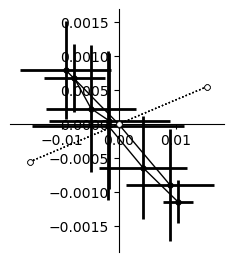

In [213]:


f,ax = plt.subplots(1,1,figsize=(7/2.54,8/2.54))
ax.spines.left.set_position('zero')
ax.spines.left.set_color('k')
ax.spines.right.set_color('none')
ax.spines.bottom.set_position('zero')
ax.spines.bottom.set_color('k')
ax.spines.top.set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ex = pertdata.loc[idx[0,0,:,:,:],:]
db = ex.index.get_level_values('filedb').unique()[0]
da = ex.index.get_level_values('fileda').unique()[0]
n = ex.index.get_level_values('fileN').unique()[0]

x0 = ex['<x>'].iloc[0:3].mean()
y0 = ex['<y>'].iloc[0:3].mean()



fx = ex['<F_x>'].iloc[0:3].mean()
fy = ex['<F_y>'].iloc[0:3].mean()
s = 1-fx-fy
gammaslope = (1-fx)/fy

#linear
x_pos = np.array([-db,0,db])*fy/s
y_pos = gammaslope*x_pos
plt.plot(x_pos,y_pos,c='k',markerfacecolor='w',marker='.',zorder=4,
          linestyle=':',markeredgecolor='k',label=r'\textrm{Linear}',markersize=8,linewidth=1,markeredgewidth=0.5)
plt.plot(x_pos+da,y_pos+da,color='k',
          markerfacecolor='w',marker='.',zorder=3,
          linestyle=':',markeredgecolor='k',markersize=8,linewidth=1,markeredgewidth=0.5)
plt.plot(x_pos-da,y_pos-da,color='k',
          markerfacecolor='w',marker='.',zorder=3,
          linestyle=':',markeredgecolor='k',markersize=8,linewidth=1,markeredgewidth=0.5)

ax = plt.gca()
#ax.set_xticks([-0.012,0.012])
#ax.set_xticklabels(['-1.2%','+1.2%'],fontproperties=labelfont)
#ax.set_xticks([-0.009,-0.006,-0.003,0.003,0.006,0.009],minor=True)
#ax.set_xlim(-0.0125,0.0125)

#ax.set_yticks([-0.002,0.002])
#ax.set_ylim(-0.02,0.02)
#ax.set_yticklabels(['-0.2%','+0.2%'],fontproperties=labelfont)
#ax.set_yticks([-0.0015,-0.001,-0.0005,0.0005,0.001,0.0015],minor=True)

avglocs = {}
for i in range(ex.shape[0]//3):
    indices = [i,i*3+1,i*3+2]
    avgloc = ex['<x>'].iloc[indices].mean(),ex['<y>'].iloc[indices].mean()
    stddev = ex['<x>'].iloc[indices].std(),ex['<y>'].iloc[indices].std()
    plt.errorbar(1-avgloc[0]/x0,1-avgloc[1]/y0,
                 xerr=stddev[0]/x0,yerr=stddev[1]/y0,elinewidth=2,markersize=8,ls='-',marker='.',c='k',markeredgewidth=0.5)
    avglocs[i] = avgloc

for i in range(3):
    xpositions = 1-np.array([avglocs[3*i+2][0]/x0,avglocs[3*i][0]/x0,avglocs[3*i+1][0]/x0])
    ypositions = 1-np.array([avglocs[3*i+2][1]/y0,avglocs[3*i][1]/y0,avglocs[3*i+1][1]/y0])
    print(xpositions,ypositions)
    plt.plot(xpositions,ypositions,'-',color='k',linewidth=1)

plt.gca().tick_params(labelsize=10)
#f.savefig('figures/Nov14/IntHill_violation_perts.pdf',bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

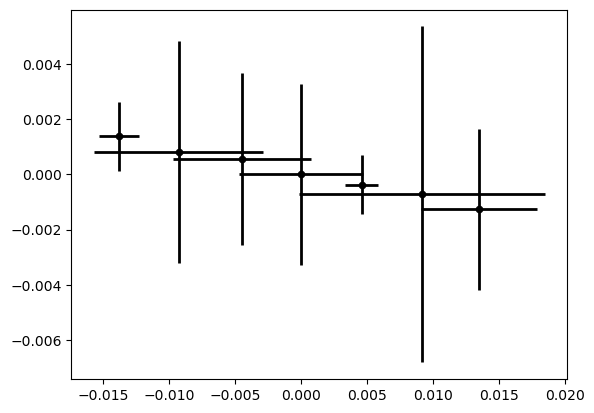

In [214]:
avgs = ex.groupby('gamma')[['<x>','<y>']].mean()
stds = ex.groupby('gamma')[['<x>','<y>']].std()
plt.scatter(1-avgs['<x>']/avgs['<x>'].loc[0.7],1-avgs['<y>']/avgs['<y>'].loc[0.7],c='k',marker='o',s=20)
plt.errorbar(1-avgs['<x>']/avgs['<x>'].loc[0.7],1-avgs['<y>']/avgs['<y>'].loc[0.7],
             xerr=np.sqrt((stds['<x>'])**2+(stds['<x>'].loc[0.7]/avgs['<x>'].loc[0.7])**2),
             yerr=np.sqrt((stds['<y>'])**2+(stds['<y>'].loc[0.7]//avgs['<y>'].loc[0.7])**2),
             fmt='none',c='k',elinewidth=2)


In [215]:
avgs = ex.groupby('gamma')[['<x>','<y>']].mean()
stds = ex.groupby('gamma')[['<x>','<y>']].std()

test = (1-ex.set_index('gamma')[['<x>','<y>']]/avgs.loc[0.7])

In [216]:
test

,<x>,<y>
gamma,,
0.7000,0.000105,0.000127
0.7000,0.000195,0.000202
0.7000,0.000099,0.000106
0.7105,0.013392,-0.001364
0.7105,0.013517,-0.001305
0.7105,0.013649,-0.001130
0.6895,-0.013758,0.001446
0.6895,-0.013811,0.001346
0.6895,-0.013846,0.001371


In [217]:
fcmeans = test.groupby('gamma').mean().drop(0.7)
fcstds = test.groupby('gamma').std().drop(0.7)

In [218]:
fcmeans

,<x>,<y>
gamma,,
0.6895,-0.013805,0.001387
0.6930,-0.009280,0.000820
0.6965,-0.004477,0.000555
0.7035,0.004612,-0.000376
0.7070,0.009181,-0.000726
0.7105,0.013519,-0.001266


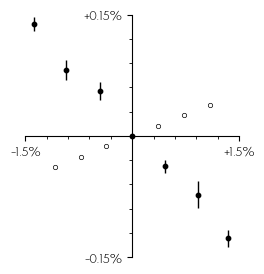

In [240]:
f,ax = plt.subplots(1,1,figsize=(7/2.54,8/2.54))
ax.spines.left.set_position('zero')
ax.spines.left.set_color('k')
ax.spines.right.set_color('none')
ax.spines.bottom.set_position('zero')
ax.spines.bottom.set_color('k')
ax.spines.top.set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ex = pertdata.loc[idx[0,0,:,:,:],:]
db = ex.index.get_level_values('filedb').unique()[0]
da = ex.index.get_level_values('fileda').unique()[0]
n = ex.index.get_level_values('fileN').unique()[0]

x0 = ex['<x>'].iloc[0:3].mean()
y0 = ex['<y>'].iloc[0:3].mean()



fx = ex['<F_x>'].iloc[0:3].mean()
fy = ex['<F_y>'].iloc[0:3].mean()
s = 1-fx-fy
gammaslope = (1-fx)/fy

#linear
x_pos = np.sort(0.7-ex['gamma'].unique())*fy/s
y_pos = gammaslope*x_pos
plt.scatter(x_pos,y_pos,facecolor='w',marker='o',
            zorder=3,edgecolor='k',
            s=10,linewidth=0.5)

plt.scatter(fcmeans['<x>'],fcmeans['<y>'],c='k',marker='o',s=10)
plt.scatter(0,0,c='k',marker='o',s=10,zorder=4)
plt.errorbar(fcmeans['<x>'],fcmeans['<y>'],
             xerr=np.sqrt(fcstds['<x>']**2+(stds['<x>']/avgs['<x>']).loc[0.7]**2)/np.sqrt(3),
                          yerr=np.sqrt(fcstds['<y>']**2+(stds['<y>']/avgs['<y>']).loc[0.7]**2)/np.sqrt(3),
                          fmt='none',c='k',elinewidth=1)

labelfont.set_size(10)
ax = plt.gca()
ax.set_xticks([-0.015,0.015])
ax.set_xticklabels(['-1.5%','+1.5%'],fontproperties=labelfont)
ax.set_xticks([-0.012,-0.009,-0.006,-0.003,0.003,0.006,0.009,0.012],minor=True)
ax.set_xlim(-0.015,0.015)

ax.set_yticks([-0.0015,0.0015])
ax.set_ylim(-0.0015,0.0015)
ax.set_yticklabels(['-0.15%','+0.15%'],fontproperties=labelfont)
ax.set_yticks([-0.0012,-0.0009,-0.0006,-0.0003,0.0003,0.0006,0.0009,0.0012],minor=True)
f.savefig('figures/Dec4/OnelinePerts.pdf',bbox_inches='tight')

In [227]:
ex

Exec Time  \
fileN fileda filedb sysname                                  perturbation perturbation class              
0     0      0.015  Data/singlelineplots/12-10 1256/system_0 0            lngn                1078160.0   
                                                             1            lngn                1200820.0   
                                                             2            lngn                2490760.0   
                                                             3            lngu                1081930.0   
                                                             4            lngu                1209040.0   
                                                             5            lngu                1088610.0   
                                                             6            lngd                1180140.0   
                                                             7            lngd                1055370.0   
                                                             8            lngd                1179400.0   
             0.010  Data/singlelineplots/12-10 1256/system_0 0            lngn                1116150.0   
                                                             1            lngn                1087960.0   
                                                             2            lngn                1051550.0   
                                                             3            lngu                1122240.0   
                                                             4            lngu                1099910.0   
                                                             5            lngu                1133190.0   
                                                             6            lngd                1085450.0   
                                                             7            lngd                1103600.0   
                                                             8            lngd                1076780.0   
             0.005  Data/singlelineplots/12-10 1256/system_0 0            lngn                4334400.0   
                                                             1            lngn                1365110.0   
                                                             2            lngn                1199480.0   
                                                             3            lngu                4340680.0   
                                                             4            lngu                1360960.0   
                                                             5            lngu                4330910.0   
                                                             6            lngd                1361660.0   
                                                             7            lngd                4324390.0   
                                                             8            lngd                1234550.0   

                                                                                                 Sim Time  \
fileN fileda filedb sysname                                  perturbation perturbation class                
0     0      0.015  Data/singlelineplots/12-10 1256/system_0 0            lngn                131510000.0   
                                                             1            lngn                131513000.0   
                                                             2            lngn                131513000.0   
                                                             3            lngu                133290000.0   
                                                             4            lngu                133310000.0   
                                                             5            lngu                133305000.0   
                                                             6            lngd                129726000.0   
         

In [220]:
x_pos

array([ 0.01088543,  0.00725695,  0.00362848, -0.        , -0.00362848,
       -0.00725695, -0.01088543])

In [221]:
np.corrcoef(fcmeans['<x>'],fcmeans['<y>'])[0,1]**2

np.float64(0.9945773042250652)

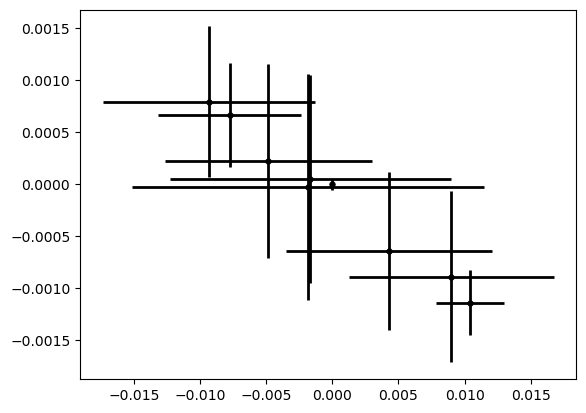

In [226]:
avglocs = {}
for i in range(ex.shape[0]//3):
    indices = [i,i*3+1,i*3+2]
    avgloc = ex['<x>'].iloc[indices].mean(),ex['<y>'].iloc[indices].mean()
    stddev = ex['<x>'].iloc[indices].std(),ex['<y>'].iloc[indices].std()
    plt.errorbar(1-avgloc[0]/x0,1-avgloc[1]/y0,
                 xerr=stddev[0]/x0,yerr=stddev[1]/y0,elinewidth=2,markersize=8,ls='-',marker='.',c='k',markeredgewidth=0.5)
    avglocs[i] = avgloc

In [223]:
x0

np.float64(34.21623333333333)

KeyError: 81

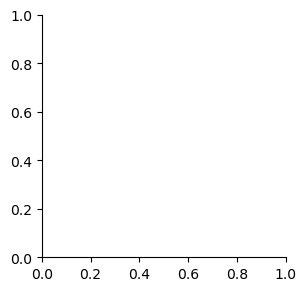

In [224]:


f,ax = plt.subplots(1,1,figsize=(8/2.54,8/2.54))
ax.spines.left.set_position('zero')
ax.spines.left.set_color('k')
ax.spines.right.set_color('none')
ax.spines.bottom.set_position('zero')
ax.spines.bottom.set_color('k')
ax.spines.top.set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ex = pertdata.loc[idx[81,0.001,:,'Data/IntHill_consistent_viol_paramratio_dists/11-18 1106/system_0',:],:]
db = ex.index.get_level_values('filedb').unique()[0]
da = ex.index.get_level_values('fileda').unique()[0]
n = ex.index.get_level_values('fileN').unique()[0]

x0 = ex['<x>'].iloc[0]
y0 = ex['<y>'].iloc[0]



fx = sensitivty_x(ex['<x>'].iloc[0],ex['<y>'],ex['alpha'].iloc[0],ex['nx'].iloc[0],ex['Kx'].iloc[0],float(ex['ny'].iloc[0]),ex['Ky'].iloc[0],ex['offset'].iloc[0])
fy = sensitivty_y(ex['<x>'].iloc[0],ex['<y>'].iloc[0],ex['alpha'].iloc[0],ex['nx'].iloc[0],ex['Kx'].iloc[0],float(ex['ny'].iloc[0]),ex['Ky'].iloc[0],ex['offset'].iloc[0])
s = 1 - fx.mean() - fy.mean()
gammaslope = (1-fx.mean())/fy.mean()


#linear
x_pos = np.array([-db,0,db])*fy/s
y_pos = gammaslope*x_pos
plt.plot(x_pos,y_pos,c='k',markerfacecolor='w',marker='.',zorder=4,
          linestyle='--',markeredgecolor='k',label=r'\textrm{Linear}',markersize=10)
plt.plot(x_pos+da,y_pos+da,color='k',
          markerfacecolor='w',marker='.',zorder=3,
          linestyle='--',markeredgecolor='k',markersize=10)
plt.plot(x_pos-da,y_pos-da,color='k',
          markerfacecolor='w',marker='.',zorder=3,
          linestyle='--',markeredgecolor='k',markersize=10)

#ax = plt.gca()
#ax.set_xticks([-0.02,0.02])
#ax.set_xticklabels(['-2%','+2%'],fontproperties=labelfont)
#ax.set_xticks([-0.015,-0.01,-0.005,0.005,0.01,0.015],minor=True)

#ax.set_yticks([-0.02,0.02])
#ax.set_ylim(-0.02,0.02)
#ax.set_yticklabels(['-2%','+2%'],fontproperties=labelfont)
#ax.set_yticks([-0.015,-0.01,-0.005,0.005,0.01,0.015],minor=True)
avglocs = {}
for i in range(9):
    indices = [i*3,i*3+1,i*3+2]
    avgloc = ex['<x>'].iloc[indices].mean(),ex['<y>'].iloc[indices].mean()
    stddev = ex['<x>'].iloc[indices].std(),ex['<y>'].iloc[indices].std()
    plt.errorbar(1-avgloc[0]/x0,1-avgloc[1]/y0,
                 xerr=stddev[0]/x0,yerr=stddev[1]/y0,elinewidth=1,markersize=10,ls='-',marker='.',c='k')
    avglocs[i] = avgloc

for i in range(3):
    xpositions = 1-np.array([avglocs[3*i+2][0]/x0,avglocs[3*i][0]/x0,avglocs[3*i+1][0]/x0])
    ypositions = 1-np.array([avglocs[3*i+2][1]/y0,avglocs[3*i][1]/y0,avglocs[3*i+1][1]/y0])
    plt.plot(xpositions,ypositions,'-',color='k')


plt.gca().tick_params(labelsize=10)
#f.savefig('figures/Nov14/IntHill_violation_perts.pdf',bbox_inches='tight')

In [ ]:
ex.loc[(25,0.001)]

/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_89004/2192300436.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ex.loc[(25,0.001)]


Exec Time     Sim Time         Steps  \
filedb perturbation perturbation class                                         
0.005  0            lngn                1082690.0  131501000.0  7.400620e+09   
       1            lngn                1150930.0  131514000.0  7.399410e+09   
       2            lngn                1075190.0  131503000.0  7.401000e+09   
       3            lngu                1068140.0  132102000.0  7.431500e+09   
       4            lngu                1061180.0  132099000.0  7.431120e+09   
       5            lngu                1065200.0  132103000.0  7.430880e+09   
       6            lngd                1069960.0  130880000.0  7.368330e+09   
       7            lngd                1066390.0  130896000.0  7.369120e+09   
       8            lngd                1150100.0  130915000.0  7.369090e+09   
       9            lugn                1077240.0  131480000.0  7.407570e+09   
       10           lugn                1164960.0  131476000.0  7.406570e+09   
       11           lugn                1071230.0  131483000.0  7.406670e+09   
       12           lugu                1072250.0  132099000.0  7.437920e+09   
       13           lugu                1076620.0  132070000.0  7.438820e+09   
       14           lugu                1076340.0  132092000.0  7.439140e+09   
       15           lugd                1071610.0  130873000.0  7.376970e+09   
       16           lugd                1071210.0  130873000.0  7.374710e+09   
       17           lugd                1132770.0  130903000.0  7.376330e+09   
       18           ldgn                1072670.0  131528000.0  7.393540e+09   
       19           ldgn                1166360.0  131538000.0  7.393620e+09   
       20           ldgn                1076530.0  131535000.0  7.393830e+09   
       21           ldgu                1069820.0  132091000.0  7.423780e+09   
       22           ldgu                1073170.0  132141000.0  7.424310e+09   
       23           ldgu                1072690.0  132125000.0  7.425590e+09   
       24           ldgd                1053370.0  130929000.0  7.361940e+09   
       25           ldgd                1062610.0  130900000.0  7.360800e+09   
       26           ldgd                1141740.0  130900000.0  7.362040e+09   

                                          Flux Bal x    Flux Bal y  \
filedb perturbation perturbation class                               
0.005  0            lngn                3.375580e-05  2.714820e-06   
       1            lngn                4.145410e-05  3.417970e-05   
       2            lngn                6.893070e-05  3.256210e-05   
       3            lngu                3.447280e-05  1.661240e-05   
       4            lngu                8.450200e-05  1.477650e-05   
       5            lngu                3.874550e-06  3.474290e-08   
       6            lngd                3.377890e-07  3.270270e-05   
       7            lngd                4.125700e-05  8.687140e-06   
       8            lngd                1.406160e-05  2.182830e-05   
       9            lugn                3.338470e-05  2.186890e-05   
       10           lugn                2.971670e-05  2.561200e-05   
       11           lugn                9.150720e-05  3.215090e-05   
       12           lugu                7.439470e-05  5.964580e-06   
       13           lugu                7.040330e-05  1.815020e-05   
       14           lugu                1.600100e-05  7.188690e-06   
       15           lugd                5.993490e-05  2.093250e-05   
       16           lugd                9.651370e-05  2.380200e-06   
       17           lugd                2.524810e-05  1.127150e-06   
       18           ldgn                9.722540e-05  1.114870e-05   
       19           ldgn                3.455910e-05  3.432490e-05   
       20           ldgn                7.630270e-05  1.819570e-05   
       21           ldgu                3.282610e-05  3.931090e-05   
       22           ldgu               

In [ ]:
s

np.float64(0.7065796014071823)